In [3]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd

np.random.seed(55)

#upload wine.data
from google.colab import files
uploaded = files.upload()

  #  -- The attributes are (dontated by Riccardo Leardi, 
	# riclea@anchem.unige.it )
 	# 1) Alcohol
 	# 2) Malic acid
 	# 3) Ash
	# 4) Alcalinity of ash  
 	# 5) Magnesium
	# 6) Total phenols
 	# 7) Flavanoids
 	# 8) Nonflavanoid phenols
 	# 9) Proanthocyanins
	# 10)Color intensity
 	# 11)Hue
 	# 12)OD280/OD315 of diluted wines
 	# 13)Proline           

names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alvalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonfalvinoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data = pd.read_csv('wine.data', names=names)

def prepare_data(data, class_name, attribute_names):
  X = data[attribute_names]
  #subtracting by 1 because weird things happen on the graphs when the classes don't start at 0
  y = data[class_name] - 1

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

  # standardize the features
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  sc.fit(X_train)
  X_train_std = sc.transform(X_train)
  X_test_std = sc.transform(X_test)

  return X_train_std, X_test_std, y_train, y_test

Saving wine.data to wine.data


The SVM here is trained with every available attribute in the dataset. To better show how the full SVM is working I've broken the attributes down into pairs below, training using the same parameters for the SVM but with different inputs. 

In [4]:
X_train_std, X_test_std, y_train, y_test = prepare_data(data, names[0], names[1:])

svm = SVC(kernel='rbf', random_state=55, gamma=.1, C=1.0)
svm.fit(X_train_std, y_train)

preds = svm.predict(X_test_std)

print(f'Predictions: {preds}\nActual: {y_test.tolist()}\nAccuracy = {100 * sum(preds == y_test.tolist()) / len(preds):.2f}%')

Predictions: [0 2 1 2 2 1 0 1 0 2 2 2 1 0 1 2 0 0 2 0 1 2 2 1 1 1 1 2 1 1 0 1 1 1 2 1 2
 0 1 1 2 0 1 2 2 1 1 0 0 1 0 1 1 1]
Actual: [0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2]
Accuracy = 96.30%


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


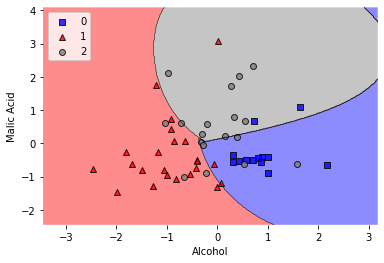

Accuracy = 74.07%


In [5]:
X_train_std, X_test_std, y_train, y_test = prepare_data(data, names[0], names[1:3])

svm = SVC(kernel='rbf', random_state=55, gamma=.1, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_test_std, y_test.to_numpy(), clf=svm, colors='blue,red,gray')
plt.xlabel(names[1])
plt.ylabel(names[2])
plt.legend(loc='upper left')
plt.show()

print(f'Accuracy = {100 * sum(svm.predict(X_test_std) == y_test.tolist()) / len(y_test):.2f}%')

The SVM here does pretty well to classify the data given that many of the gray points are scattered well into 'red territory' or 'blue territory'.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


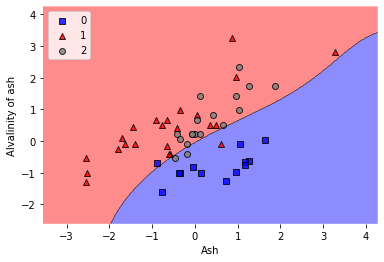

Accuracy = 62.96%


In [6]:
X_train_std, X_test_std, y_train, y_test = prepare_data(data, names[0], names[3:5])

svm = SVC(kernel='rbf', random_state=55, gamma=.1, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_test_std, y_test.to_numpy(), clf=svm, colors='blue,red,gray')
plt.xlabel(names[3])
plt.ylabel(names[4])
plt.legend(loc='upper left')
plt.show()

print(f'Accuracy = {100 * sum(svm.predict(X_test_std) == y_test.tolist()) / len(y_test):.2f}%')

The SVM falls on its face a bit here. With this gamma it is unable to find a way to predict the gray class. Increasing the gamma allows it to classify the gray class but using the same parameters as the 13-attribute classifier it is not able.

Comparing the results here to the MLP from project 1 makes me realise my big error in project 1: I didn't standardize the data. Initially when making the paired attribute graphs I was passing in the unstandardized X_test set and I was getting the same one-class prediction as I got in Project 1. I suspect if I go back to project 1 and standardize the data I can match the 95% accuracy the SVM is able to get. 